In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.DataFrame({
    'Hours of Study': [1,2,3,4,5,6,7,8],
    'Pass': [0,0,0,0,1,1,1,1]
})

x = df['Hours of Study'].to_numpy()
y = df['Pass'].to_numpy()
n = len(x)
df.head()

,Hours of Study,Pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [25]:
b0 = 0
b1 = 0

alpha = 0.01
errors = []
epochs = 500
epsilon = 1e-9

for i in range(epochs):
    z = b0 + b1*x
    p = sigmoid(z)
    error = p - y
    errors.append(-1/n*(np.sum(y*np.log(p) + (1-y)*np.log(1-p))))
    b0 = b0 - alpha*(1/n)*np.sum(error)
    b1 = b1 - alpha*(1/n)*np.sum(error*x)
    
print(f"Intercept b0: {b0}")
print(f"Coeffcient b1: {b1}")

Intercept b0: -0.7506048747282789
Coeffcient b1: 0.30865256885239073


In [26]:
from sklearn.linear_model import LogisticRegression
x = x.reshape(-1,1)
y = y.reshape(-1,1)
model = LogisticRegression()
model.fit(x,y)

print(f"model intercept b0: {model.intercept_}")
print(f"model coefficent b1: {model.coef_}")

model_pred = model.predict(x)

print(f"model predictions : {model_pred}")

model intercept b0: [-5.26410791]
model coefficent b1: [[1.16979937]]
model predictions : [0 0 0 0 1 1 1 1]


In [27]:
from sklearn.metrics import accuracy_score

y_pred = b0 + b1*x
y_pred = [1 if i > 0.5 else 0 for i in y_pred]
print(f"predictions:", y_pred)

print(f"accuracy: {accuracy_score(y, y_pred)*100}%")

predictions: [0, 0, 0, 0, 1, 1, 1, 1]
accuracy: 100.0%


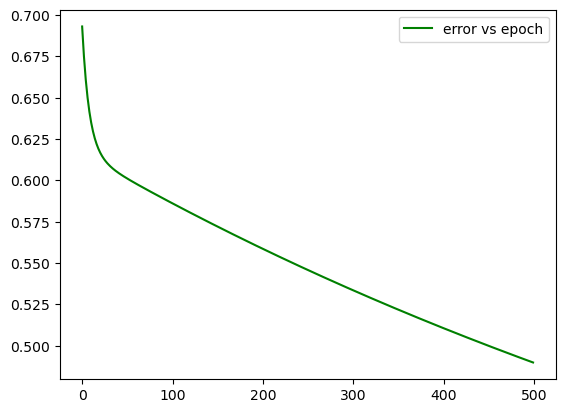

In [28]:
plt.plot(range(500), errors, color="green", label="error vs epoch")
plt.legend()
plt.show()